### Centroid - based on centroid word embeddings

In [2]:
%run utils/text.ipynb
# Make imports and defs avaiable from utils/nlp
%run utils/nlp.ipynb

In [3]:
# Load text 1 - 3 where 1 = Galileo, 2 = Mendel, 3 = Order
df = load_text(1)

# Collect text from current dataframe
text = df['text'][0]

#print(text)

In [4]:
#!pip install git+https://github.com/lambdaofgod/text-summarizer
import text_summarizer

In [5]:
# Load pre-trained word embeddings
embedding_model = text_summarizer.centroid_word_embeddings.load_gensim_embedding_model(
    'glove-wiki-gigaword-50'
)

In [6]:
# Build summarizer with adjusted topic threshold and simularity threshold
TOPIC_THRESH=0.75
SIM_THRESH=0.965

centroid_word_embedding_summarizer = text_summarizer.CentroidWordEmbeddingsSummarizer(
    embedding_model, 
    preprocess_type='nltk', 
    topic_threshold=TOPIC_THRESH, sim_threshold=SIM_THRESH
)

In [7]:
def centroid_sum(text):
    # Run model and collect result
    centroid_word_embedding_summary = centroid_word_embedding_summarizer.summarize(text)
    
    # Collect all sentences as a list
    sentences_sum = nltk.sent_tokenize(centroid_word_embedding_summary)
    
    # Make the list of sentences into one string
    final = ' '.join(sentences_sum)
    
    return final

In [8]:
centroid_sum(text)

"Galileo Galilei, born in Pisa, Italy in 1564 was a key figure in the scientiﬁc revolution in Europe about four centuries ago. Galileo proposed the concept of acceleration. From experiments on motion of bodies on inclined planes or falling freely, he contradicted the Aristotelian notion that a force was required to keep a body in motion, and that heavier bodies fall faster than lighter bodies under gravity. He thus arrived at the law of inertia that was the starting point of the subsequent epochal work of Isaac Newton. Galileo's discoveries in astronomy were equally revolutionary. Not undeservedly, many regard Galileo as the father of modern science."

### Centroid ROUGE Test on Newsroom set

In [9]:
# Make utils/rouge and utils/heatmap available
%run utils/rouge.ipynb

In [10]:
# load 3 texts from newsroom data set named from their index
text_7, summary_7 = load_news(7)
text_70, summary_70 = load_news(70)
text_150, summary_150 = load_news(150)

In [11]:
centroid_comp_7 = centroid_sum(text_7)
centroid_comp_70 = centroid_sum(text_70)
centroid_comp_150 = centroid_sum(text_150)

In [48]:
#print(centroid_comp_7)

<Figure size 432x288 with 0 Axes>

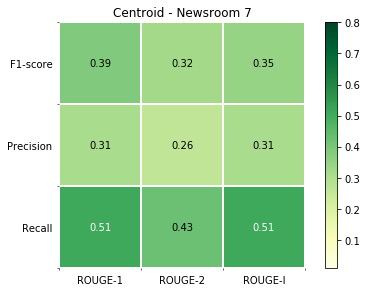

In [12]:
rouge_heatmap(centroid_comp_7, summary_7)

plt.title('Centroid - Newsroom 7')
plt.show()

In [53]:
#print(centroid_comp_70)

<Figure size 432x288 with 0 Axes>

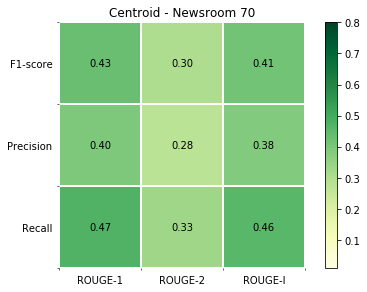

In [13]:
rouge_heatmap(centroid_comp_70, summary_70)

plt.title('Centroid - Newsroom 70')
plt.show()

In [54]:
#print(centroid_comp_150)

<Figure size 432x288 with 0 Axes>

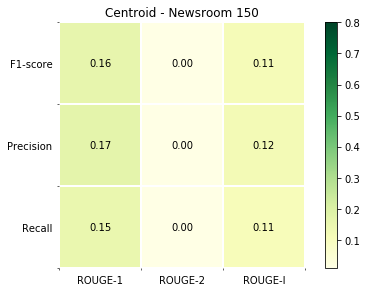

In [14]:
rouge_heatmap(centroid_comp_150, summary_150)

plt.title('Centroid - Newsroom 150')
plt.show()